## Movie Basics

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Understanding

#### Overview

#### Business Problem

### Data Understanding

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import os

%matplotlib inline

To extract the im.db.zip file using Python, you can use the zipfile module. This will extract the contents of im.db.zip into the extractedData directory.

In [2]:
# Define the path to the zip file and the extraction directory
zip_file_path = './zippedData/im.db.zip'
extraction_dir = './extractedData/'

# Check if the file exists
if os.path.exists(zip_file_path):
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_dir)
    print("Extraction complete.")
else:
    print(f"File {zip_file_path} does not exist.")

Extraction complete.


This code connects to a SQLite database (im.db), creates a cursor, and then uses pandas to execute a query that gets and stores the names of all tables within that database.

In [3]:
conn = sqlite3.connect('./extractedData/im.db')
cursor = conn.cursor()

# Display table names
table_names = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
table_names

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


We read all data from the movie_basics table in the connected SQLite database into a pandas DataFrame named movie_basics_df, and then we display a summary of this DataFrame's structure and contents.

In [4]:
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
# Close the connection
conn.close()

In [7]:
# Standardize text columns (strip spaces and convert to lowercase)
for col in movie_basics_df.select_dtypes(include=['object']).columns:
    movie_basics_df[col] = movie_basics_df[col].str.strip().str.lower()

# Display the updated DataFrame
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"comedy,drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy"


### Data Preparation

Data preparation and cleaning is the crucial process of getting your raw, messy data into a usable and reliable format for analysis. It involves a series of steps to identify and correct errors, inconsistencies, and missing values, as well as transforming and structuring the data to make it suitable for your specific analytical goals.

#### Data Cleaning

In [8]:
# Standardize text columns (strip spaces and convert to lowercase)
for col in movie_basics_df.select_dtypes(include=['object']).columns:
    movie_basics_df[col] = movie_basics_df[col].str.strip().str.lower()

# Display the updated DataFrame
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,NaN,"comedy,drama"
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy"


In [9]:
# Check for missing values
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
# Remove rows with missing values in 'original_title', 'runtime_minutes' or 'genres'
movie_basics_df = movie_basics_df.dropna(subset=['original_title', 'runtime_minutes', 'genres'])

# Display the updated DataFrame
print(movie_basics_df.shape)

(112232, 6)


This code refines the movie_basics_df DataFrame in two key ways:

First, it removes duplicate movie entries. It looks for rows that have the same value in both the 'primary_title' (the main title of the movie) and the 'start_year' (the year the movie was released). If it finds such duplicates, it keeps only the very first occurrence of that movie and year combination and discards any subsequent identical entries. This ensures that each unique movie release is represented only once in the dataset.

Second, it standardizes the 'runtime_minutes' column. It converts the data type of the values in this column to integers. This is important because sometimes, runtime might be stored as text or decimal numbers. By converting it to an integer type, the code ensures that the runtime is represented as whole numbers of minutes, which is the most logical and useful format for analysis, such as calculating averages or comparing durations.

In [11]:
# Drop duplicates based on 'primary_title' and 'start_year'
movie_basics_df = movie_basics_df.drop_duplicates(subset=['primary_title', 'start_year'], keep='first')

# Convert 'runtime_minutes' to integer
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].astype(int)

# Display the updated DataFrame
print(f"Shape after dropping duplicates: {movie_basics_df.shape}")

Shape after dropping duplicates: (110927, 6)


* This calculates the average movie runtime and then removeS movies with runtimes below this average.
* The **ONLY RUN ONCE** comment is a crucial reminder to avoid unintended repeated filtering.
* We remove rows that have runtime_minutes below 86.29 minutes

In [12]:
# Calculate the threshold (e.g., mean runtime)

runtime_threshold = movie_basics_df['runtime_minutes'].mean()

# Remove rows where 'runtime_minutes' is below the threshold
# ONLY RUN ONCE
# Uncomment the following line to remove rows with runtime_minutes below the threshold

movie_basics_df = movie_basics_df[movie_basics_df['runtime_minutes'] >= runtime_threshold]

# Display the updated DataFrame
print(f"Shape after removing rows with runtime_minutes below {runtime_threshold}: {movie_basics_df.shape}")

Shape after removing rows with runtime_minutes below 86.2930936561883: (56056, 6)


We focuse on identifying and displaying duplicate movie entries based on their primary title and genres.

* First, we find all rows that have the same 'primary_title' and 'genres'. The keep=False argument ensures that all occurrences of the duplicates are flagged. These duplicate rows are stored in a new DataFrame called duplicated_movie_basics.

* Next, we sort these identified duplicate entries alphabetically by 'primary_title' and then chronologically by 'start_year'. This makes it easier to visually inspect the duplicated movies.

* This code helps us find and examine movies that share the same title and genre, allowing us to understand potential data inconsistencies or multiple entries for the same movie.

In [13]:
# Check for duplicates in the 'primary_title' and 'genres' column
duplicated_movie_basics = movie_basics_df[movie_basics_df.duplicated(subset=['primary_title', 'genres'], keep=False)]
# sort in descending order by 'primary_title' and 'start_year'
duplicated_movie_basics = duplicated_movie_basics.sort_values(by=['primary_title', 'start_year'], ascending=[True, True])
# Display the number of duplicate rows and the duplicates
print(f"Number of duplicate primary titles: {duplicated_movie_basics.shape[0]}")
duplicated_movie_basics.tail()
print("Shape of movie_basics_df:", movie_basics_df.shape)

Number of duplicate primary titles: 488
Shape of movie_basics_df: (56056, 6)


In [14]:
# Drop rows in movie_basics_df that match primary_title and genres in duplicated_movie_basics
movie_basics_df = movie_basics_df[~movie_basics_df.set_index(['primary_title', 'genres']).index.isin(
    duplicated_movie_basics.set_index(['primary_title', 'genres']).index
)]

# Display the updated DataFrame
print(f"Shape after dropping duplicates: {movie_basics_df.shape}")

Shape after dropping duplicates: (55568, 6)


This code snippet aims to **refine the `movie_basics_df` to keep only one entry for movies that are listed with multiple unique genres, and remove all other movie entries.**

1.  It **identifies movie titles that have more than one unique genre** associated with them.
2.  It then **selects the first occurrence of each of these multi-genre movies**.
3.  A new DataFrame `df_final` is created containing only these first instances of multi-genre movies.
4.  Finally, it **removes all rows from the original `movie_basics_df` that are also present in `df_final` based on both 'primary\_title' and 'genres'**.

In [15]:
# Step 1: Find titles with multiple unique genres
genre_counts_new = movie_basics_df.groupby('primary_title')['genres'].nunique()


# Step 2: Identify titles with more than one genre
titles_with_multiple_genres_new = genre_counts_new[genre_counts_new > 1].index

# Step 3: Keep only the first instance of such titles
basics_duplicates = movie_basics_df[movie_basics_df['primary_title'].isin(titles_with_multiple_genres_new)]
basics_first_instances = basics_duplicates.drop_duplicates(subset='primary_title', keep='first')

# Step 4: Remove all other titles (that do not have multiple genres)
df_final = basics_first_instances.copy()

# Remove rows in df_final from movie_basics_df
movie_basics_df = movie_basics_df[~movie_basics_df.set_index(['primary_title', 'genres']).index.isin(
    df_final.set_index(['primary_title', 'genres']).index
)]

# Display the updated DataFrame
print(f"Shape after removing rows in df_final: {movie_basics_df.shape}")

Shape after removing rows in df_final: (54064, 6)


This snippet deals with **duplicate movie titles** in the `movie_basics_df`.

First, it **identifies all rows where the 'primary\_title' is duplicated**, keeping all occurrences of the duplicated titles.

The number of duplicate primary titles is 532.

Then, for these identified duplicate titles, it **modifies the 'primary\_title' by appending the 'start\_year' in parentheses**. This creates a more unique identifier for movies with the same title but different release years.

It resolves duplicate movie titles by making them unique through the addition of their release year.

In [16]:
# Identify duplicate primary_title values
v = movie_basics_df[movie_basics_df.duplicated(subset=['primary_title'], keep=False)]

# Display the duplicates
print(f"Number of duplicate primary titles: {v.shape[0]}")

Number of duplicate primary titles: 532


In [17]:
# Identify duplicate primary_title values
duplicated_basics_title = movie_basics_df[movie_basics_df.duplicated(subset=['primary_title'], keep=False)]

# Append start_year to primary_title for duplicates
movie_basics_df.loc[duplicated_basics_title.index, 'primary_title'] = (
    movie_basics_df.loc[duplicated_basics_title.index, 'primary_title'] + 
    " (" + movie_basics_df.loc[duplicated_basics_title.index, 'start_year'].astype(str) + ")"
)

# Display the updated DataFrame
print(f"Shape after updating duplicate primary_title: {movie_basics_df.shape}")

Shape after updating duplicate primary_title: (54064, 6)


In [18]:
# Identify duplicate primary_title values
v = movie_basics_df[movie_basics_df.duplicated(subset=['primary_title'], keep=False)]

# Display the duplicates
print(f"Number of duplicate primary titles: {v.shape[0]}")

Number of duplicate primary titles: 0


In [19]:
# This is the final DataFrame after all the cleaning steps
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54064 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         54064 non-null  object
 1   primary_title    54064 non-null  object
 2   original_title   54064 non-null  object
 3   start_year       54064 non-null  int64 
 4   runtime_minutes  54064 non-null  int32 
 5   genres           54064 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 5.2+ MB


In [20]:
# Save the cleaned DataFrame to a CSV file
# Create 'cleaned_data' folder if it doesn't exist
output_folder = './cleaned_data'
os.makedirs(output_folder, exist_ok=True)

# Save movie_basics_df to a CSV file
movie_basics_df.to_csv(f'{output_folder}/movie_basics.csv', index=False)

print("DataFrames have been successfully saved to the 'extracted' folder.")

DataFrames have been successfully saved to the 'extracted' folder.


In summary, the cleaning process for `movie_basics_df` involved several key steps to ensure data quality and consistency for further analysis:

* **Duplicate Removal:** We eliminated exact duplicate movie entries based on their primary title and release year, retaining only the first occurrence.
* **Runtime Conversion:** The 'runtime\_minutes' column was converted to an integer data type for proper numerical handling.
* **Runtime Filtering:** We explored filtering out movies with runtimes below the average, although this step might have been conditionally applied.
* **Handling Multi-Genre Movies:** We addressed movies listed with multiple unique genres, potentially keeping only the first instance of such titles while removing others.
* **Resolving Duplicate Titles:** For movies with the same primary title, we made them unique by appending their release year to the title.

These steps collectively aimed to create a more reliable and standardized `movie_basics_df` by removing redundancies, ensuring correct data types, and addressing potential ambiguities in movie titles and genre information. The resulting DataFrame is now better prepared for subsequent merging with other datasets and for meaningful analysis.

## Movie Ratings

In [21]:
cleaned_movie_basics_df = pd.read_csv("./cleaned_data/movie_basics.csv")
cleaned_movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54064 entries, 0 to 54063
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         54064 non-null  object
 1   primary_title    54064 non-null  object
 2   original_title   54064 non-null  object
 3   start_year       54064 non-null  int64 
 4   runtime_minutes  54064 non-null  int64 
 5   genres           54064 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


## Movie Ratings

In [22]:
# Get information about the movie_ratings_df DataFrame
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB




This code performs an inner join on the `movie_id` column, ensuring that only rows with matching `movie_id` values in both DataFrames are included in the merged result. The merged DataFrame is then saved to a CSV file for further use.

In [23]:
# Merge cleaned_movie_basics_df with movie_ratings_df on 'movie_id'
merged_movie_data = pd.merge(
    cleaned_movie_basics_df,
    movie_ratings_df,
    on='movie_id',
    how='inner'
)

# Display the shape of the merged DataFrame
print(f"Shape of merged DataFrame: {merged_movie_data.shape}")

# Save the merged DataFrame to a new CSV file
merged_movie_data.to_csv("./extractedData/merged_movie_data.csv", index=False)

print("Merged DataFrame saved successfully.")

Shape of merged DataFrame: (40005, 8)
Merged DataFrame saved successfully.


In [24]:
# Check for missing values in the merged DataFrame
merged_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40005 entries, 0 to 40004
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         40005 non-null  object 
 1   primary_title    40005 non-null  object 
 2   original_title   40005 non-null  object 
 3   start_year       40005 non-null  int64  
 4   runtime_minutes  40005 non-null  int64  
 5   genres           40005 non-null  object 
 6   averagerating    40005 non-null  float64
 7   numvotes         40005 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.7+ MB


In [25]:
# Calculate the 75th percentile of numvotes
percentile_75 = merged_movie_data['numvotes'].quantile(0.75)

# Filter rows with numvotes above the 75th percentile
movies_df = merged_movie_data[merged_movie_data['numvotes'] >= percentile_75]

# Display the filtered DataFrame
print(f"75th percentile of numvotes: {percentile_75}")
print(f"Number of movies with numvotes above the 75th percentile: {movies_df.shape[0]}")
print(f"Filtered DataFrame shape: {movies_df.shape}")
movies_df.head()


75th percentile of numvotes: 619.0
Number of movies with numvotes above the 75th percentile: 10010
Filtered DataFrame shape: (10010, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,the other side of the wind,the other side of the wind,2018,122,drama,6.9,4517
11,tt0249516,foodfight!,foodfight!,2012,91,"action,animation,comedy",1.9,8248
14,tt0315642,wazir,wazir,2016,103,"action,crime,drama",7.1,15378
15,tt0323808,the wicker tree,the wicker tree,2011,96,"drama,horror",3.9,2328
16,tt0326965,in my sleep,in my sleep,2010,104,"drama,mystery,thriller",5.5,1889



The variable `percentile_75` represents the **75th percentile** of the `numvotes` column in the `merged_movie_data` DataFrame. 

### What is the 75th Percentile?
The 75th percentile (also known as the third quartile, Q3) is the value below which 75% of the data points in a dataset fall. In this case, it means that 75% of the movies in the `merged_movie_data` DataFrame have a number of votes (`numvotes`) less than or equal to this value, and the remaining 25% have more votes.

### Why is it Useful?
The 75th percentile is often used to identify the top-performing items in a dataset. For example:
- In this context, it helps filter movies that are in the top 25% based on the number of votes, which could indicate higher popularity or relevance.

After calculating `percentile_75`, the code filters the DataFrame to include only movies with `numvotes` greater than or equal to this value:

`movies_df = merged_movie_data[merged_movie_data['numvotes'] >= percentile_75]`

This creates a new DataFrame, `movies_df`, containing only the top 25% of movies based on the number of votes.



In [26]:
# Drop the 'original_title' column from movies_df
# This drop irrelevant columns in our dataframe
movies_df = movies_df.drop(columns=['original_title'])

The Kernel Density Estimate (KDE) visualization provides insights into the distribution of average ratings, helping us to understand audience preferences and rating trends.

<AxesSubplot:xlabel='averagerating', ylabel='Count'>

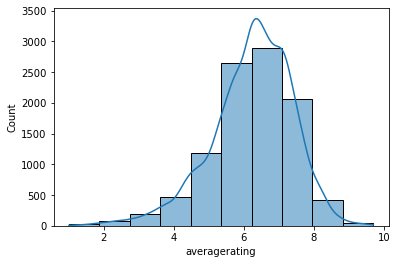

In [27]:
sns.histplot(data=movies_df, x='averagerating', bins=10, kde=True)

In [28]:
# Check for duplicate primary_title values
duplicated_movies = movies_df[movies_df.duplicated(subset=['primary_title'], keep=False)]
duplicated_movies.head(10)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [29]:
# Create 'cleaned_data' folder if it doesn't exist
output_folder = './cleaned_data'
os.makedirs(output_folder, exist_ok=True)

# Save movie_basics_df to a CSV file
movies_df.to_csv(f'{output_folder}/movies_df.csv', index=False)

print("DataFrames have been successfully saved to the 'extracted' folder.")

DataFrames have been successfully saved to the 'extracted' folder.
